## Master IASD
# Deep Learning for Image Analisis

# Practical Session

In this practical work we study different techniques for unsupervised generation using linear approaches as well as Autoencoders.

HOMEWORK: You should analyse the result of this notebook for only one class of Fashion-Mnist or CIFAR (according to your computational power).


Santiago VELASCO-FORERO

Email: Santiago.Velasco@mines-paristech.fr

Subject: Practical Session DLIA lastname name

Deadline: Nov 5 / 2024


**I chose the Fashion-Mnist dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import random

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [3]:
import sklearn.metrics
import sys


def mmd(x, y,scale=1000):
    """ Maximum Mean Discrepancy (MMD)"""
    """" Using Gaussian Kernel """
    """ [1] Arthur Gretton, Karsten M Borgwardt, Malte J Rasch, Bernhard Schölkopf, and Alexander Smola. A kernel two-sample test. Journal of Machine Learning Research, 13(Mar):723–773, 2012. """
    """ [2] Gintare Karolina Dziugaite, Daniel M Roy, and Zoubin Ghahramani. Training generative neural networks via maximum mean discrepancy optimization. arXiv preprint arXiv:1505.03906, 2015. """

    def gaussian_kernel(a, b, sigma=10.0):
        dist = np.sum((a[:, np.newaxis] - b[np.newaxis, :]) ** 2, axis=2)
        gamma = (2 * sigma ** 2)
        return np.exp(-dist / gamma)

    Kxx = gaussian_kernel(x, x)
    Kyy = gaussian_kernel(y, y)
    Kxy = gaussian_kernel(x, y)

    mmd_value = np.mean(Kxx) + np.mean(Kyy) - 2 * np.mean(Kxy)
    return scale*mmd_value



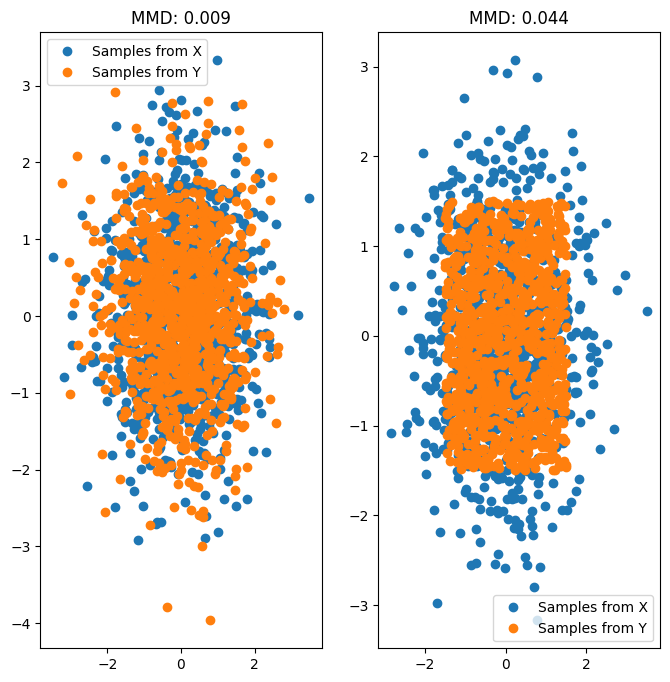

In [4]:
# Example usage Maximum Mean Discrepancy

N=1000
D=2
x = np.random.randn(N, D)
y = np.random.randn(N, D)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(x[:,0],x[:,1],'o',label='Samples from X')
plt.plot(y[:,0],y[:,1],'o',label='Samples from Y')
plt.title('MMD: '+str(np.round(mmd(x, y),3)))
plt.legend()

plt.subplot(1,2,2)
x = np.random.randn(N, D)
y = 3*(np.random.rand(N, D)-.5)
plt.plot(x[:,0],x[:,1],'o',label='Samples from X')
plt.plot(y[:,0],y[:,1],'o',label='Samples from Y')
plt.title('MMD: '+str(np.round(mmd(x, y),3)))
plt.legend()
plt.show()



##  Q1. Understanding (Maximum Mean Discrepancy).

A. For two samples of size 500 from a Gaussian distribution (0,1) calculate the value of MMD, varying the dimension from 2 to 50. Make a plot of MMD vs dimension by doing 10 repetitions of the experiment.
 What do you observe and what can you conclude from this experiment?

**Answer**
*As shown on the plot, as the dimension increases, the MMD also increases and start to be more spread. Therefore, the plot shows the correlation between D and MMD, as the former is a metric that compares the features in high-dimension to measure the discrepancy between two probability distributions.*

B. Repeat the same experiment for samples from the uniform distribution (0,1). What do you observe? What can you conclude from this experiment, with respect to A?

**Answer**
*The uniform distribution presents significantly smaller values than the standard normal distribuition.
The graph shows the comparision between the uniform and normal graphs.The reason for that is that $N(0,1)$ has a variance, meaning that it is more widely spread resulting in significant differences and in a higher MMD, whereas we had a different result for uniform as it is less spread.*

C. Now compare samples from the Gaussian distribution (0,1) with one from a Gaussian distribution (.1,1). Is the MMD able to detect the difference between the distributions? What can you conclude from this experiment?

**Answer**
*Yes, MMD is able to detect because the plot shows an a higher mean for the $N(0.1,1) than the standard normal, as we can conclude comparing the orange and blue points on the graph. I can conclude that MMD is capable to differentiate between the distributions.*

D. Set a dimension according to 2 times your birth day, (my is January 14, so my dimension would be 28) and perform experiment A (same distribution) and C (different distribution) by changing N between 5 and 500 with a step of 10. What do you observe? Since what value of N the MMD is able to find that the samples are of different distribution, and if you should recommend a threshold value, what would it be?

**Answer**
*My birthday is also $14$, so I set $D=28$. I can observe visible differences between the two distributions, with $N(0,1)$ points generally bellow $N(1.1,1)$ points. Moreover, as we fixed $D=28$, we could realize the differences in the sample size: as it increases, the $MMD$ is less spread. Additionally, a good threshold value to evidence the distributions is $N=100$, as after that both distributions settle to close values.*

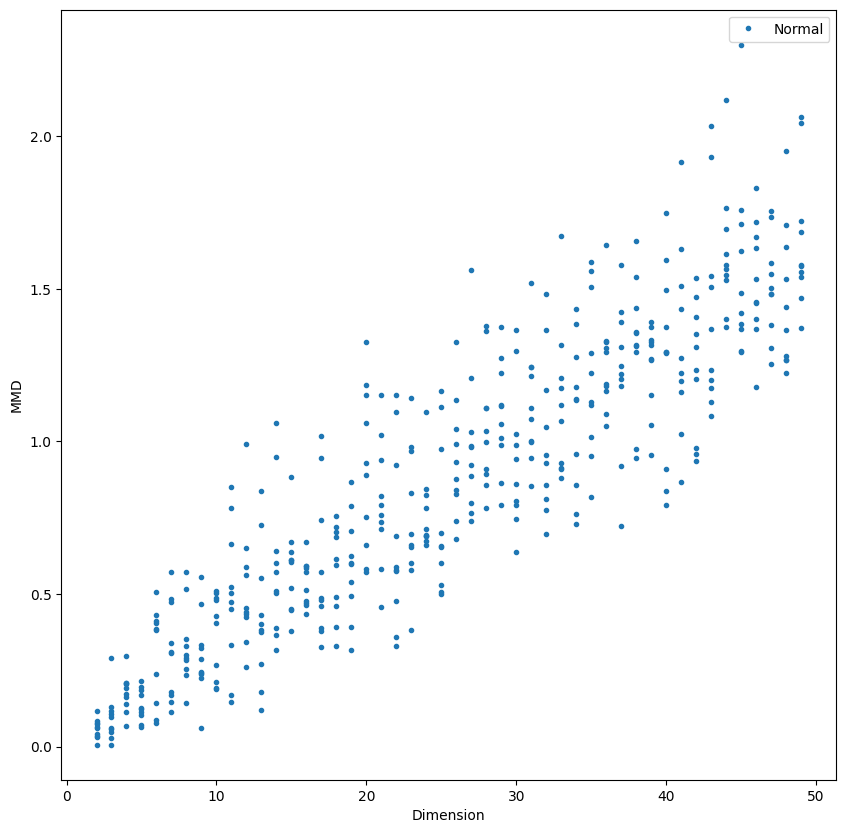

In [5]:
#Answer to question 1
N=500
resNormal=[]
Dplot=[]
for rep in range(10):
    for D in range(2,50):
        x = np.random.randn(N, D)
        y = np.random.randn(N, D)
        resNormal.append([mmd(x, y)])
        Dplot.append(D)
plt.figure(figsize=(10,10))
plt.plot(Dplot,resNormal,'.')
plt.legend(['Normal'])
plt.xlabel('Dimension')
plt.ylabel('MMD')
plt.show()

In [6]:
#Answer to question B
N=500
res_unif=[]
Dplot_unif=[]
for rep in range(10):
    for D in range(2,50):
        x = np.random.rand(N, D)
        y = np.random.rand(N, D)
        res_unif.append([mmd(x, y)])
        Dplot_unif.append(D)

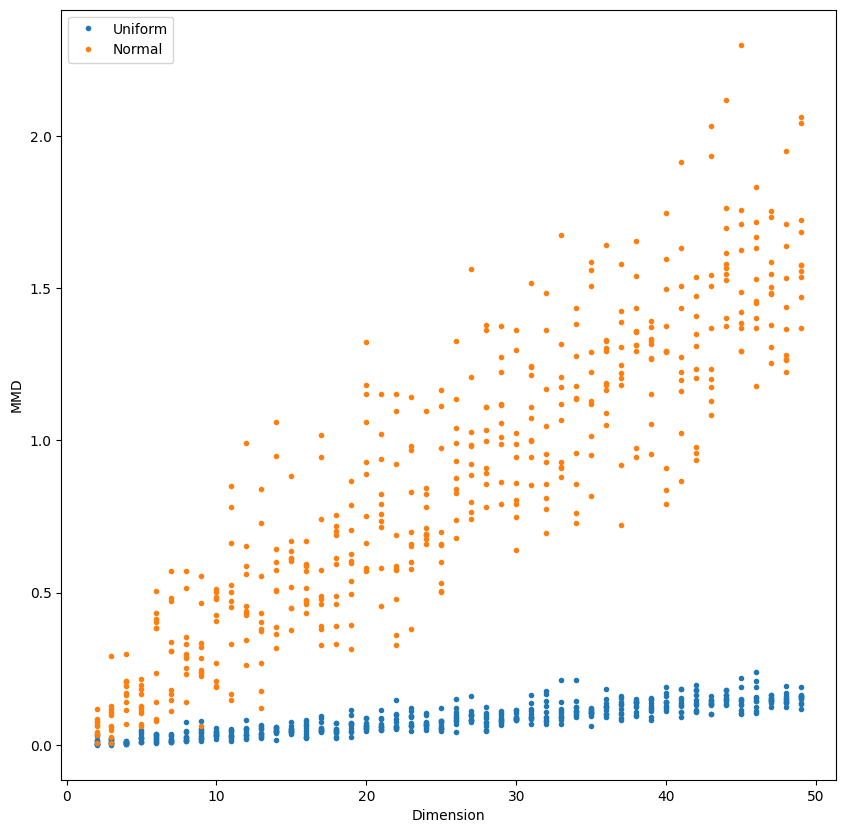

In [7]:
plt.figure(figsize=(10,10))
plt.plot(Dplot,res_unif,'.')
plt.plot(Dplot,resNormal,'.')
plt.legend(['Uniform', 'Normal'])
plt.xlabel('Dimension')
plt.ylabel('MMD')
plt.show()

In [8]:
#Answer to question C
N=500
resNormal_01=[]
Dplot_01=[]
for rep in range(10):
    for D in range(2,50):
        x = np.random.randn(N, D)
        y = np.random.randn(N, D) + 0.1
        resNormal_01.append([mmd(x, y)])
        Dplot_01.append(D)


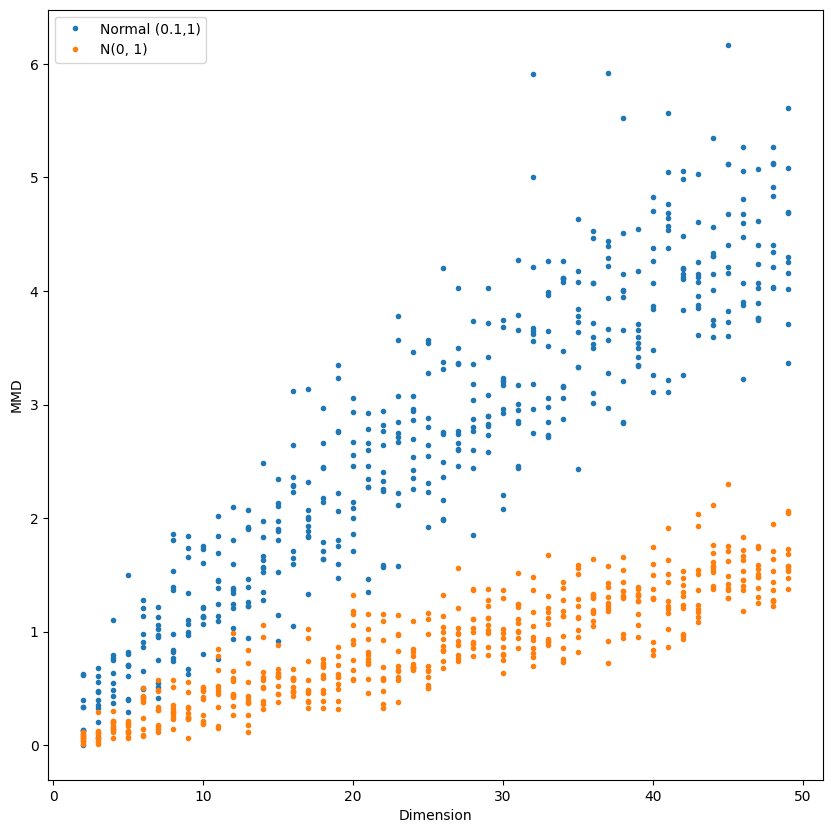

In [9]:
plt.figure(figsize=(10,10))
plt.plot(Dplot_01,resNormal_01,'.')
plt.plot(Dplot_01,resNormal,'.')
plt.legend(['Normal (0.1,1)','N(0, 1)'])
plt.xlabel('Dimension')
plt.ylabel('MMD')
plt.show()

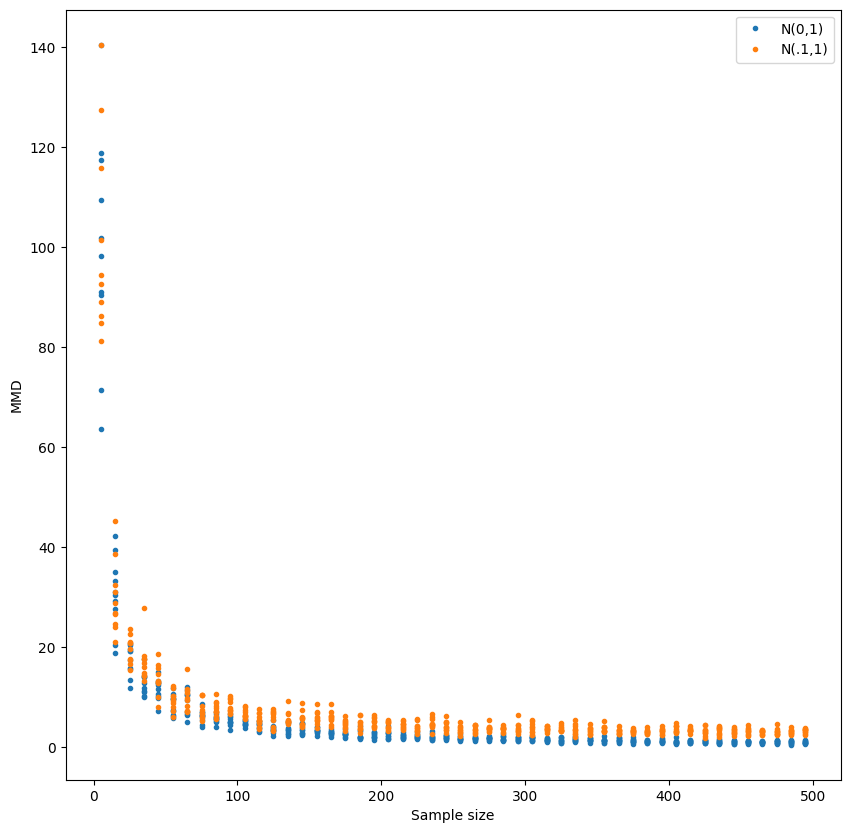

In [10]:
#Answer to question D
D = 14*2

resNormal=[]
resNormalShifted=[]
Dplot=[]
for rep in range(10):
    for N in range(5,500,10):
        x = np.random.randn(N, D)
        y1 = np.random.randn(N, D)
        y2 = np.random.randn(N, D) + 0.1

        resNormal.append([mmd(x, y1)])
        resNormalShifted.append([mmd(x, y2)])
        Dplot.append(N)
plt.figure(figsize=(10,10))
plt.plot(Dplot,resNormal,'.',label='N(0,1)')
plt.plot(Dplot,resNormalShifted,'.',label='N(.1,1)')
plt.legend()
plt.xlabel('Sample size')
plt.ylabel('MMD')
plt.show()

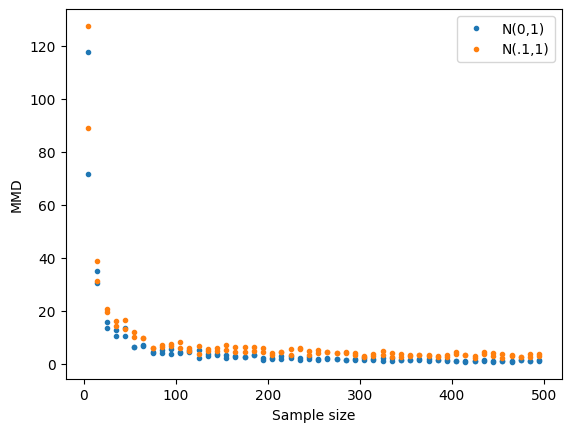

In [11]:

plt.plot(Dplot[:100],resNormal[:100],'.',label='N(0,1)') # Limit x-axis to 100 samples
plt.plot(Dplot[:100],resNormalShifted[:100],'.',label='N(.1,1)') # Limit x-axis to 100 samples
plt.legend()
plt.xlabel('Sample size')
plt.ylabel('MMD')
plt.show()

##  Q2. Understanding MMD.
Suppose you want to train a generative model for MNIST. Use the class number 9 and class 7 to determine how many samples are needed to use an MMD as a good criterion to determine if a generation method is good.

**Answer**
As the previous experiment, we want to test $N$, which the graph belows evidences that $N=20$ is a proper separator to differentiate between classes $9$ and $7$.

In [12]:
(X, Y), (XTEST, YTEST) = keras.datasets.mnist.load_data()
X=X/255.

def get_random_samples(X,nsamples):
    N = X.shape[0]
    D = X.shape[1]*X.shape[2]
    X = X.reshape(N,D)
    idx = random.sample(range(N),nsamples)
    return X[idx,:]

#Include your answer here
resSameClass=[]
resDifferentClass=[]
Dplot=[]
D=28
for rep in range(10):
    for N in range(5,250,5):
        x = get_random_samples(X[Y==9],N)
        y1 = get_random_samples(X[Y==9],N)
        y2 = get_random_samples(X[Y==7],N)
        resSameClass.append([mmd(x, y1)])
        resDifferentClass.append([mmd(x, y2)])
        Dplot.append(N)

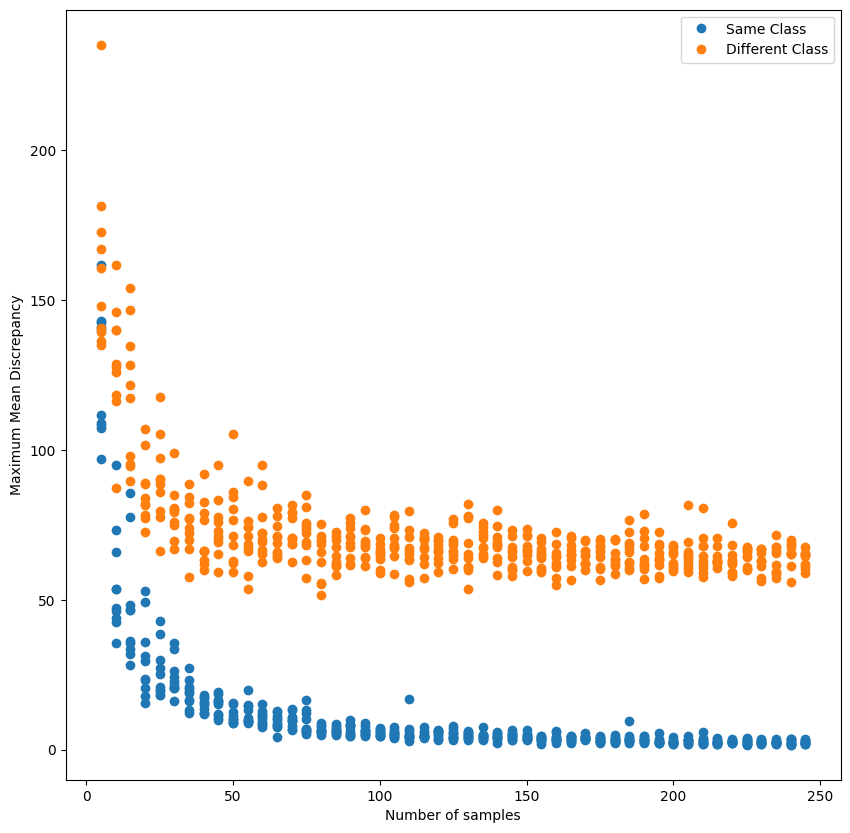

In [13]:
plt.figure(figsize=(10,10))
plt.plot(Dplot,resSameClass,'o')
plt.plot(Dplot,resDifferentClass,'o')
plt.xlabel('Number of samples')
plt.ylabel('Maximum Mean Discrepancy')
plt.legend(['Same Class','Different Class',])
plt.show()

In [14]:
import tensorflow as tf

class Sampling(keras.layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = keras.ops.shape(z_mean)[0]
        dim = keras.ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + keras.ops.exp(0.5 * z_log_var) * epsilon


def get_model_enconder(input_shape):
    encoder_inputs=keras.layers.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = keras.layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Flatten()(x)
    encoder_output = keras.layers.Dense(LATENT_DIM, activation="relu")(x)
    return keras.Model(encoder_inputs,encoder_output)

def get_model_decoder():
    latent_inputs = keras.Input(shape=(LATENT_DIM,))
    x = keras.layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
    x = keras.layers.Reshape((7, 7, 64))(x)
    x = keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Conv2D(32, 3, use_bias=False, padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Conv2D(32, 3, use_bias=False, padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2DTranspose(16, 3, use_bias=False,padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    decoder_outputs = keras.layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
    return keras.Model(latent_inputs, decoder_outputs, name="decoder")

def get_model_variational_enconder(input_shape):
    encoder_inputs=keras.layers.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = keras.layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Flatten()(x)
    z_mean = keras.layers.Dense(LATENT_DIM, name="z_mean")(x)
    z_log_var = keras.layers.Dense(LATENT_DIM, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    return keras.Model(encoder_inputs,[z_mean, z_log_var, z])


def get_model_variational_decoder():
    latent_inputs = keras.Input(shape=(LATENT_DIM,))
    x = keras.layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
    x = keras.layers.Reshape((7, 7, 64))(x)
    x = keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Conv2D(32, 3, use_bias=False, padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Conv2D(32, 3, use_bias=False, padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2DTranspose(16, 3, use_bias=False,padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    decoder_outputs = keras.layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
    return keras.Model(latent_inputs, decoder_outputs, name="decoder")


class AE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = keras.ops.mean(
                keras.ops.sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )
            total_loss = reconstruction_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
        }

    def encode(self,data):
        z = self.encoder(data)
        return z

    def decode(self,z):
        reconstruction = self.decoder(z)
        return reconstruction

    def call(self,data):
        return self.decoder(self.encoder(data))

    def fitGMM(self,data,number_clusters,covariance_type='diag'):
        self.GMM=GaussianMixture(n_components=number_clusters,covariance_type=covariance_type, random_state=0).fit(self.encode(data))
        return self.GMM

    def sampleGMM(self,number_samples):
        return self.GMM.sample(number_samples)



class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = keras.ops.mean(
                keras.ops.sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var))
            kl_loss = keras.ops.mean(keras.ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + 0.1*kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def encode(self,data):
        z_mean, z_log_var, z = self.encoder(data)
        return z

    def decode(self,z):
        reconstruction = self.decoder(z)
        return reconstruction

    def call(self,data):
        return self.decode(self.encode(data))

    def fitGMM(self,data,number_clusters,covariance_type='diag'):
        self.GMM=GaussianMixture(n_components=number_clusters,covariance_type=covariance_type, random_state=0).fit(self.encode(data))
        return self.GMM

    def sampleGMM(self,number_samples):
        return self.GMM.sample(number_samples)



In [15]:
#Configuration for experiments
LATENT_DIM=49

NUM_EPOCHS=256
BATCH_SIZE=32

NSAMPLES_TEST=200 #USE TO COMPARE

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


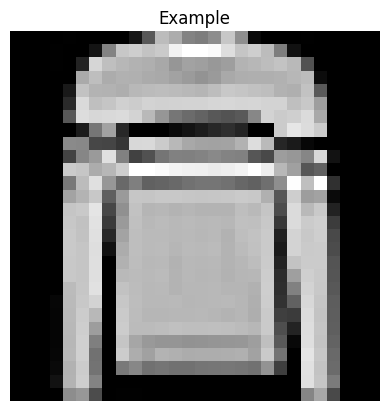

In [31]:
#Importing the dataset
# Load the MNIST dataset
# DATABASE='mnist'
DATABASE='fashion'
CLASS_TO_GENERATE=2
# DATABASE='cifar10'

if DATABASE=='cifar10':
   #https://en.wikipedia.org/wiki/CIFAR-10
   (X, Y), (XTEST, YTEST) = keras.datasets.cifar10.load_data()
   N,W,H,B=X.shape
   classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
   CLASS_TO_GENERATE=0
   X=X[np.nonzero(Y==CLASS_TO_GENERATE)[0],:,:,:]
   XTEST=XTEST[np.nonzero(YTEST==CLASS_TO_GENERATE)[0],:,:,:]
   print('Using class:',classes[CLASS_TO_GENERATE])
   NSAMPLES=2000
   CMAP=None

elif DATABASE=='mnist':
#https://en.wikipedia.org/wiki/MNIST_database
  (X, Y), (XTEST, YTEST) = keras.datasets.mnist.load_data()
  X=np.expand_dims(X,axis=-1)
  XTEST=np.expand_dims(XTEST,axis=-1)
  if CLASS_TO_GENERATE is not None:
    X=X[np.nonzero(Y==CLASS_TO_GENERATE)[0],:,:,:]
    XTEST=XTEST[np.nonzero(YTEST==CLASS_TO_GENERATE)[0],:,:,:]
  N,W,H,B=X.shape
  NSAMPLES=1000
  CMAP='gray'

elif DATABASE=='fashion':
   #https://fr.wikipedia.org/wiki/Fashion_MNIST
  (X, Y), (XTEST, YTEST) = keras.datasets.fashion_mnist.load_data()
  X=np.expand_dims(X,axis=-1)
  XTEST=np.expand_dims(XTEST,axis=-1)
  if CLASS_TO_GENERATE is not None:
    X=X[np.nonzero(Y==CLASS_TO_GENERATE)[0],:,:,:]
    XTEST=XTEST[np.nonzero(YTEST==CLASS_TO_GENERATE)[0],:,:,:]
  N,W,H,B=X.shape
  NSAMPLES=1000
  CMAP='gray'

plt.imshow(X[0],cmap='gray')
plt.title('Example')
plt.axis('off')
plt.show()





# Transform to [0,1.] because the model is using sigmoid activation
X=X/255.

X=X[0:NSAMPLES,:,:]
X=np.reshape(X,[NSAMPLES,W*H*B])

XTEST=XTEST/255.

XTEST=XTEST[0:NSAMPLES_TEST,:,:]
XTEST=np.reshape(XTEST,[NSAMPLES_TEST,W*H*B])


### Principal Component Analysis (PCA)

is a dimensionality reduction technique commonly used in data analysis and machine learning. It aims to transform a high-dimensional dataset into a lower-dimensional space while preserving the most important information. PCA achieves this by identifying the principal components, which are linear combinations of the original features that capture the maximum variance in the data. The first principal component explains the largest amount of variance, followed by the second principal component, and so on. By reducing the dimensionality of the dataset, PCA can simplify the analysis, visualize the data in lower-dimensional space, and remove redundant or noisy features. It is particularly useful when dealing with datasets with a large number of variables or when visualizing high-dimensional data.

https://en.wikipedia.org/wiki/Principal_component_analysis


(1000, 784)
(1000, 49)


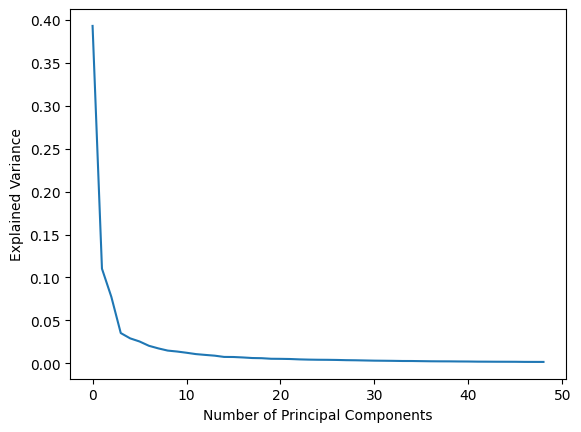

In [32]:
DIMENSION_PCA=LATENT_DIM

pca = PCA(n_components=DIMENSION_PCA)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
print(X.shape)
print(X_pca.shape)

In [33]:
#Compute the inverse projection from X_pca

X_inverse = pca.inverse_transform(X_pca)


#Compute the reconstruction error

reconstruction_error_PCA=keras.ops.mean(keras.ops.sum(keras.losses.binary_crossentropy(np.reshape(X,[NSAMPLES,H,W,B]),np.reshape(X_inverse,[NSAMPLES,H,W,B])),axis=(1, 2))).numpy()
print(reconstruction_error_PCA)

269.40644406483


<ipython-input-34-e50ea1a833e2>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx=int(idx)


(-0.5, 27.5, 27.5, -0.5)

<Figure size 1200x1200 with 0 Axes>

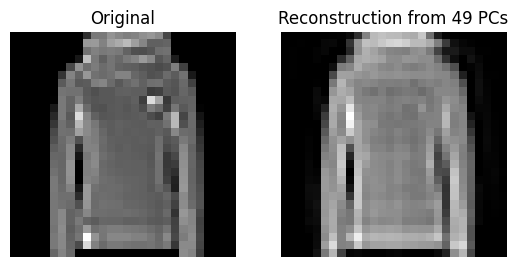

In [34]:
plt.figure(figsize=(12,12))
idx=np.random.rand(1)*NSAMPLES
idx=int(idx)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.reshape(X[idx:(idx+1),:],[W,H,B]),cmap=CMAP)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Reconstruction from '+str(DIMENSION_PCA)+' PCs')
plt.imshow(np.clip(np.reshape(X_inverse[idx:(idx+1),:],[W,H,B]),0.,1.),cmap=CMAP)
plt.axis('off')


Generation from random sampling in GMM
generate_sample_pca (200, 784)


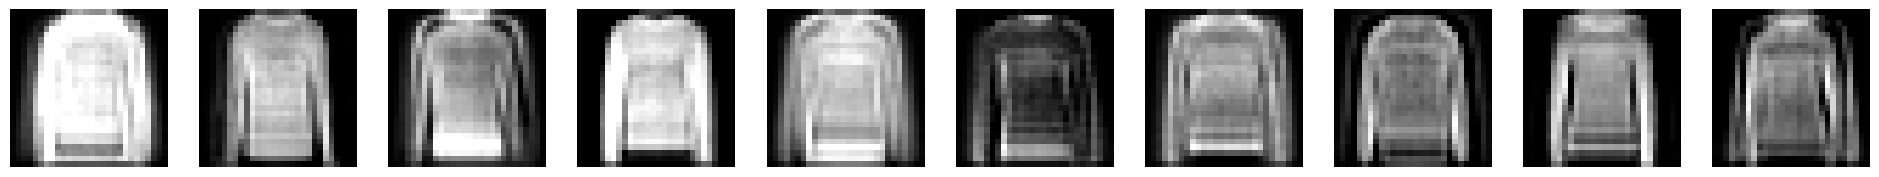

3.3974434467543


In [35]:
# Fit one multivariate gaussian distributions on reconstruction from PCA
mm_pca = GaussianMixture(n_components=1, covariance_type='diag', random_state=0).fit(X_pca)

print('Generation from random sampling in GMM')
sample = mm_pca.sample(NSAMPLES_TEST)
#sample[0].shape
generate_sample_pca= pca.inverse_transform(sample[0])
print('generate_sample_pca', generate_sample_pca.shape)

plt.figure(figsize=[24,24])
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(np.clip(np.reshape(generate_sample_pca[i,:],[W,H,B]),0,1),cmap=CMAP)
  plt.axis('off')
plt.show()

mmd_pca_GMM_only_one_cluster= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_pca,[NSAMPLES_TEST,H*W*B]))
print(mmd_pca_GMM_only_one_cluster)


In [36]:
MAX_NUMBER_OF_GAUSSIANS=30
res_mmd_pca=[]
for NUMBER_OF_GAUSSIANS in range(1,MAX_NUMBER_OF_GAUSSIANS):
  print('Computing MMD for ',NUMBER_OF_GAUSSIANS,' Gaussians')
  gmm_pca= GaussianMixture(n_components=NUMBER_OF_GAUSSIANS,covariance_type='diag', random_state=0).fit(X_pca)
  sample = gmm_pca.sample(NSAMPLES_TEST)
  generate_sample_pca= pca.inverse_transform(sample[0])
  mmd_pca_GMM= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_pca,[NSAMPLES_TEST,H*W*B]))
  res_mmd_pca.append(mmd_pca_GMM)
  print(mmd_pca_GMM)




Computing MMD for  1  Gaussians
3.3974434467543
Computing MMD for  2  Gaussians
4.620650432185736
Computing MMD for  3  Gaussians
4.317326126426879
Computing MMD for  4  Gaussians
2.670543186251706
Computing MMD for  5  Gaussians
3.9782888982113906
Computing MMD for  6  Gaussians
2.740225271439467
Computing MMD for  7  Gaussians
3.4254708836007897
Computing MMD for  8  Gaussians
4.239681485020297
Computing MMD for  9  Gaussians
4.010612333222863
Computing MMD for  10  Gaussians
2.653970507491943
Computing MMD for  11  Gaussians
3.4583485230088584
Computing MMD for  12  Gaussians
3.120372741213684
Computing MMD for  13  Gaussians
3.488216180429049
Computing MMD for  14  Gaussians
3.5827855507561956
Computing MMD for  15  Gaussians
3.2655298329595794
Computing MMD for  16  Gaussians
2.8065497933986716
Computing MMD for  17  Gaussians
3.8751786165478475
Computing MMD for  18  Gaussians
2.6234611201139124
Computing MMD for  19  Gaussians
2.950659705690306
Computing MMD for  20  Gaussians
3

***************************


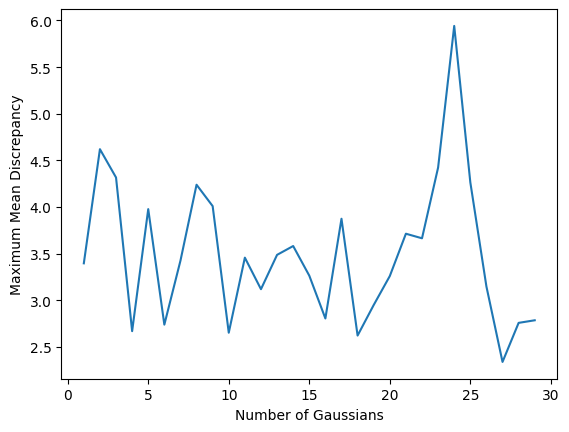

27


In [37]:
plt.figure()
plt.plot(range(1,MAX_NUMBER_OF_GAUSSIANS),res_mmd_pca,label='Diag Conv')
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()

NUM_GAUSSIANS_PCA=np.argmin(res_mmd_pca)+1
print(NUM_GAUSSIANS_PCA)

In [38]:
# Fit K gaussian distributions on X_inverse
gmm_pca= GaussianMixture(n_components=NUM_GAUSSIANS_PCA, covariance_type='diag', random_state=0).fit(X_pca)

# You can access the parameters of the fitted GMM using:
# gmm.means_  # Means of the Gaussian components
# gmm.covariances_  # Covariance matrices of the Gaussian components
# gmm.weights_  # Weights of the Gaussian components

Q1. Compute the reconstruction of the vector corresponding to the mean vector of each cluster.

(27, 49)
Generation from Mean Vectors in each cluster


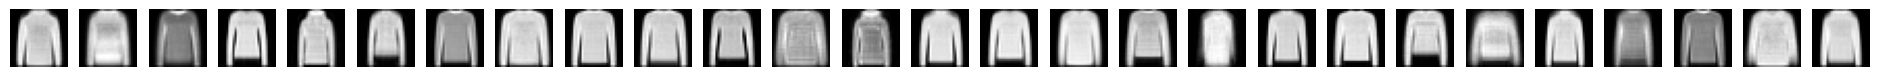

In [39]:
#Q1. Compute the reconstruction of the vector corresponding to the mean vector of each cluster.

print(gmm_pca.means_.shape)
gmm_pca_means = pca.inverse_transform(gmm_pca.means_)

print('Generation from Mean Vectors in each cluster')
plt.figure(figsize=[24,24])
for i in range(gmm_pca_means.shape[0]):
  plt.subplot(1,gmm_pca_means.shape[0],i+1)
  plt.imshow(np.clip(np.reshape(gmm_pca_means[i,:],[W,H,B]),0,1),cmap=CMAP)
  plt.axis('off')
plt.show()

Generation from random sampling in GMM


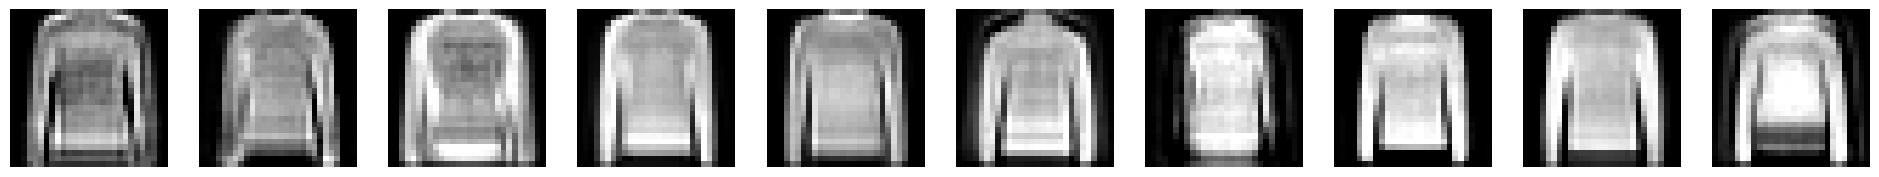

In [40]:
print('Generation from random sampling in GMM')
NUMBER_GENERATED_SAMPLES=10
sample = gmm_pca.sample(NUMBER_GENERATED_SAMPLES)
#sample[0].shape
new_sample_inverse = pca.inverse_transform(sample[0])

plt.figure(figsize=[24,24])
for i in range(NUMBER_GENERATED_SAMPLES):
  plt.subplot(1,NUMBER_GENERATED_SAMPLES,i+1)
  plt.imshow(np.clip(np.reshape(new_sample_inverse[i,:],[W,H,B]),0,1),cmap=CMAP)
  plt.axis('off')
plt.show()

In [41]:
print('Generation from random sampling in GMM on latent space produced by PCA')
NUMBER_GENERATED_SAMPLES=NSAMPLES
generated_gmm_pca=pca.inverse_transform(gmm_pca.sample(NSAMPLES_TEST)[0])
mmd_gmm_pca= mmd(np.reshape(XTEST,[XTEST.shape[0],W*H*B]), np.reshape(generated_gmm_pca,[NSAMPLES_TEST,W*H*B]))
print('MMD',mmd_gmm_pca)

Generation from random sampling in GMM on latent space produced by PCA
MMD 2.340847223320397


## AUTOENCODER

In [42]:
X=np.reshape(X,[X.shape[0],W,H,B])
print(X.shape)

XTEST=np.reshape(XTEST,[XTEST.shape[0],W,H,B])
print(XTEST.shape)

(1000, 28, 28, 1)
(200, 28, 28, 1)


In [43]:
model_encoder= get_model_enconder(input_shape=[W,H,B])
model_encoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 49)                  │         153,713 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,529 (673.94 KB)

 Trainable params: 172,529 (673.94 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_decoder= get_model_decoder()
model_decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3136)                │         156,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 32)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 14, 14, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 28, 28, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 28, 28, 16)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_5                │ (None, 28, 28, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,537 (920.07 KB)

 Trainable params: 235,537 (920.07 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
autoencoder = AE(model_encoder, model_decoder)
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=.01))

CB = [keras.callbacks.EarlyStopping(monitor='total_loss', mode='min',patience=20,restore_best_weights=True),
      keras.callbacks.ReduceLROnPlateau(monitor='total_loss', mode='min', factor=0.1,patience=10, min_lr=0.00001, verbose=1)
     ]
historyautoencoder=autoencoder.fit(X,epochs=NUM_EPOCHS,batch_size=BATCH_SIZE,verbose=2,callbacks=CB)


Epoch 1/256
32/32 - 16s - 495ms/step - reconstruction_loss: 536.8082 - total_loss: 536.8082 - learning_rate: 0.0100
Epoch 2/256
32/32 - 9s - 266ms/step - reconstruction_loss: 482.6189 - total_loss: 482.6189 - learning_rate: 0.0100
Epoch 3/256
32/32 - 0s - 6ms/step - reconstruction_loss: 395.8811 - total_loss: 395.8811 - learning_rate: 0.0100
Epoch 4/256
32/32 - 0s - 9ms/step - reconstruction_loss: 381.6638 - total_loss: 381.6638 - learning_rate: 0.0100
Epoch 5/256
32/32 - 0s - 9ms/step - reconstruction_loss: 346.0596 - total_loss: 346.0596 - learning_rate: 0.0100
Epoch 6/256
32/32 - 0s - 5ms/step - reconstruction_loss: 317.6454 - total_loss: 317.6454 - learning_rate: 0.0100
Epoch 7/256
32/32 - 0s - 5ms/step - reconstruction_loss: 313.5375 - total_loss: 313.5375 - learning_rate: 0.0100
Epoch 8/256
32/32 - 0s - 5ms/step - reconstruction_loss: 302.8568 - total_loss: 302.8568 - learning_rate: 0.0100
Epoch 9/256
32/32 - 0s - 5ms/step - reconstruction_loss: 298.9754 - total_loss: 298.9754 - 

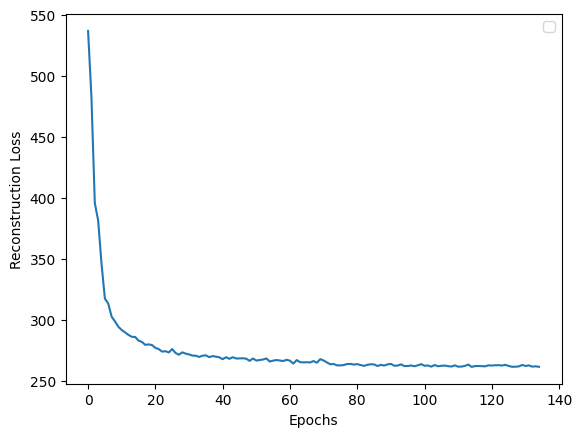

In [46]:
plt.plot(historyautoencoder.history['reconstruction_loss'])
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.legend()

In [47]:
X_autoencoder=autoencoder.encode(X)
print(X_autoencoder.shape)

(1000, 49)


(200, 49)


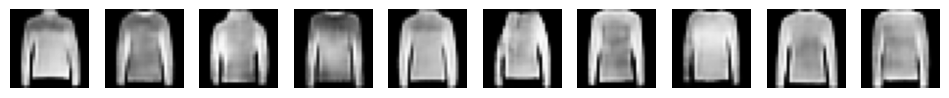

In [48]:
gmm_autoencoder = GaussianMixture(n_components=1, covariance_type='spherical', random_state=0).fit(X_autoencoder)

plt.figure(figsize=[12,12])
z=gmm_autoencoder.sample(NSAMPLES_TEST)[0]
print(z.shape)
generated_examples_autoencoder_GMM = autoencoder.decode(z)
for j in range(10):
  plt.subplot(1,10,j+1)
  plt.imshow(np.reshape(generated_examples_autoencoder_GMM[j],[W,H,B]),cmap=CMAP)
  plt.axis('off')
plt.show()

In [49]:
mmd_gmm_autoencoder= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generated_examples_autoencoder_GMM,[NSAMPLES_TEST,H*W*B]))
print(mmd_gmm_autoencoder)

39.49984657838823


In [50]:
print('NMD PCA+GMM sampler',mmd_gmm_pca)
print('NMD AUTOENCODER+GMM sampler',mmd_gmm_autoencoder)

NMD PCA+GMM sampler 2.340847223320397
NMD AUTOENCODER+GMM sampler 39.49984657838823


In [51]:
def find_best_GMM_by_MMD(autoencoder,xtrue,MAX_NUMBER_OF_GAUSSIANS=MAX_NUMBER_OF_GAUSSIANS):
    """ This funcion determine the number of Gaussians for a Gaussain Mixure model that minize the Maximum Mean Discrepancy"""
    res_mmd_autoencoder=[]
    NSAMPLES=xtrue.shape[0]
    X_encoded=autoencoder.encode(xtrue)
    for NUMBER_OF_GAUSSIANS in range(1,MAX_NUMBER_OF_GAUSSIANS):
        print('Number of Gaussians:',NUMBER_OF_GAUSSIANS)
        gmm_autoenconder = GaussianMixture(n_components=NUMBER_OF_GAUSSIANS,covariance_type='diag', random_state=0).fit(X_encoded)
        sample = gmm_autoenconder.sample(NSAMPLES)
        generate_sample_autoenconder= autoencoder.decode(sample[0])
        mmd_gmm_autoencoder= mmd(np.reshape(xtrue,[NSAMPLES,H*W*B]), np.reshape(generate_sample_autoenconder,[NSAMPLES,H*W*B]))
        res_mmd_autoencoder.append(mmd_gmm_autoencoder)
    plt.plot(res_mmd_autoencoder)
    plt.xlabel('Number of Gaussians')
    plt.ylabel('Maximum Mean Discrepancy')
    return np.argmin(res_mmd_autoencoder)+1,res_mmd_autoencoder


Number of Gaussians: 1
Number of Gaussians: 2
Number of Gaussians: 3
Number of Gaussians: 4
Number of Gaussians: 5
Number of Gaussians: 6
Number of Gaussians: 7
Number of Gaussians: 8
Number of Gaussians: 9
Number of Gaussians: 10
Number of Gaussians: 11
Number of Gaussians: 12
Number of Gaussians: 13
Number of Gaussians: 14
Number of Gaussians: 15
Number of Gaussians: 16
Number of Gaussians: 17
Number of Gaussians: 18
Number of Gaussians: 19
Number of Gaussians: 20
Number of Gaussians: 21
Number of Gaussians: 22
Number of Gaussians: 23
Number of Gaussians: 24
Number of Gaussians: 25
Number of Gaussians: 26
Number of Gaussians: 27
Number of Gaussians: 28
Number of Gaussians: 29
21


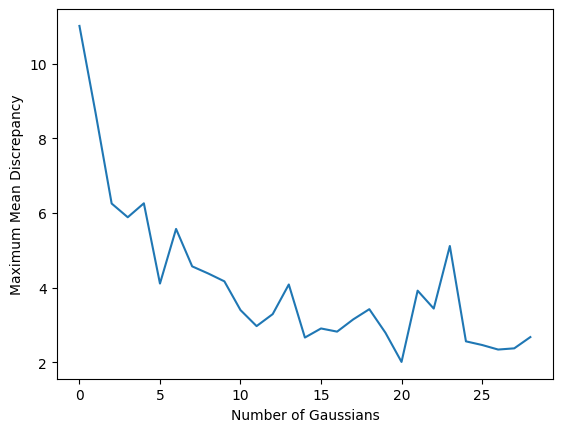

In [52]:
NUM_GAUSSIANS_AUTOENCODER,res_mmd_autoencoder=find_best_GMM_by_MMD(autoencoder,XTEST)
print(NUM_GAUSSIANS_AUTOENCODER)

In [53]:
autoencoder.fitGMM(X,NUM_GAUSSIANS_AUTOENCODER)

GaussianMixture(covariance_type='diag', n_components=21, random_state=0)

Generation of Latent Space (200, 49)
Generated Images (200, 28, 28, 1)


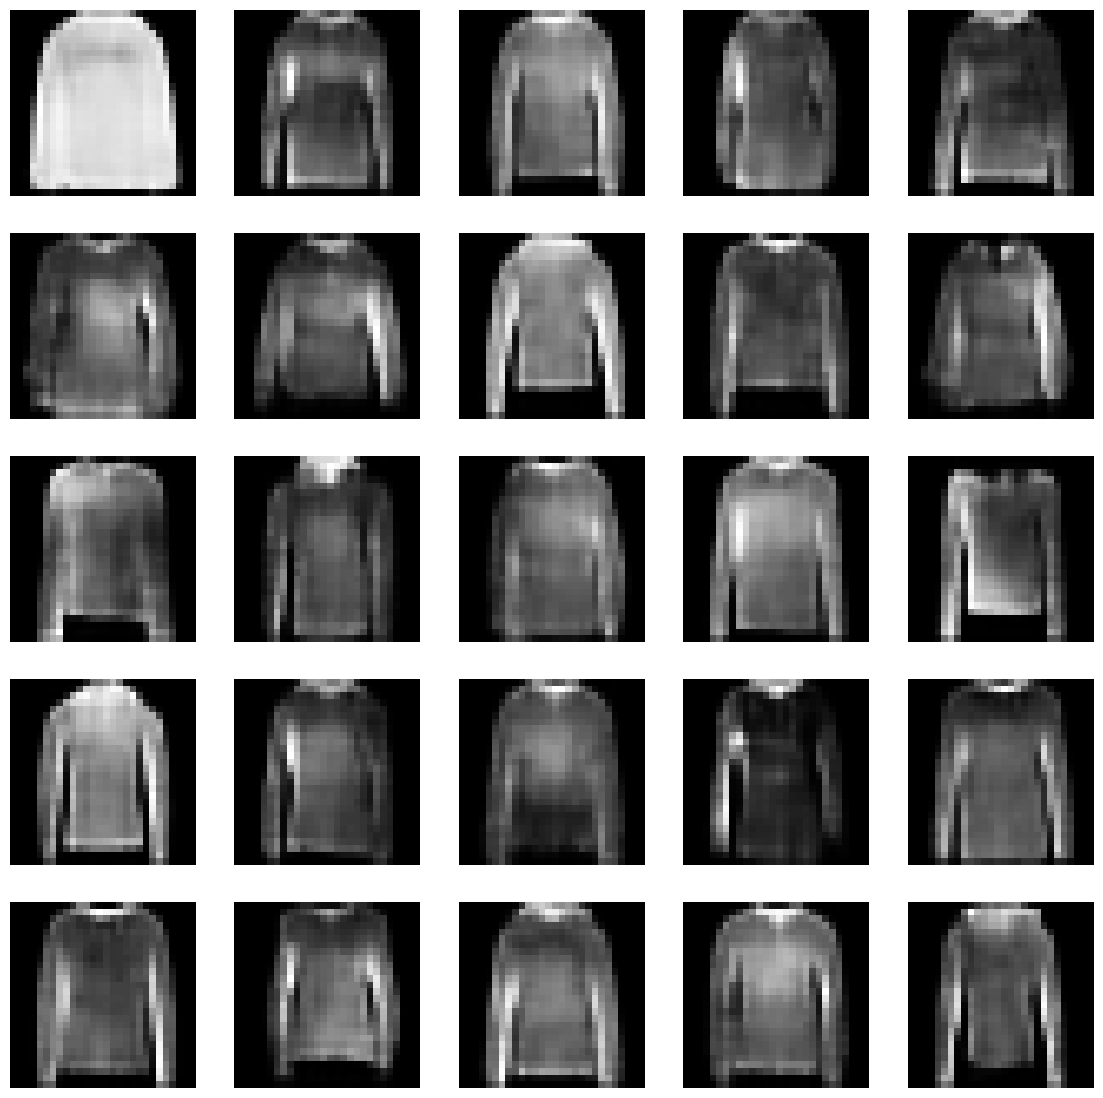

In [54]:

sample_gmm_autoencoder=autoencoder.sampleGMM(NSAMPLES_TEST)[0]
print('Generation of Latent Space',sample_gmm_autoencoder.shape)
generate_sample_autoencoder= autoencoder.decode(sample_gmm_autoencoder)
print('Generated Images',generate_sample_autoencoder.shape)

plt.figure(figsize=[14,14])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(np.reshape(generate_sample_autoencoder[i],[W,H,B]),cmap=CMAP)
    plt.axis('off')
plt.show()

***************************


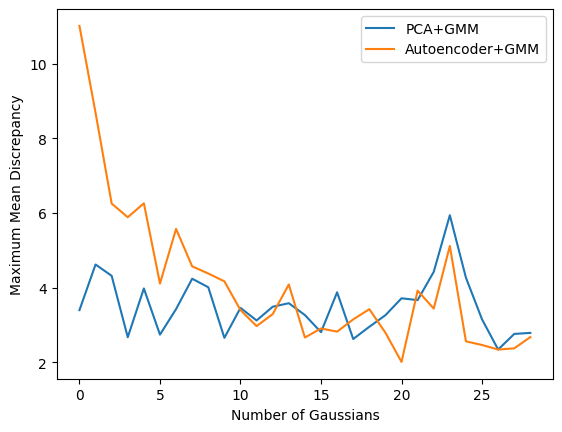

In [55]:
plt.plot(res_mmd_pca,label='PCA+GMM')
plt.plot(res_mmd_autoencoder,label='Autoencoder+GMM')
plt.legend()
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()

## Variational Autoencoder

In [56]:
variational_encoder= get_model_variational_enconder(input_shape=[W,H,B])
variational_decoder= get_model_variational_decoder()

In [57]:
variational_autoencoder = VAE(variational_encoder, variational_decoder)
variational_autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=.001))
historyvae=variational_autoencoder.fit(X,epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - kl_loss: 9.6046 - loss: 506.4871 - reconstruction_loss: 505.5267
Epoch 2/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - kl_loss: 22.9503 - loss: 362.9650 - reconstruction_loss: 360.6700
Epoch 3/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - kl_loss: 34.4401 - loss: 333.5258 - reconstruction_loss: 330.0818
Epoch 4/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - kl_loss: 39.3789 - loss: 320.7318 - reconstruction_loss: 316.7939
Epoch 5/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - kl_loss: 46.3426 - loss: 313.3426 - reconstruction_loss: 308.7083
Epoch 6/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - kl_loss: 47.6598 - loss: 306.5994 - reconstruction_loss: 301.8334
Epoch 7/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - kl_loss: 51.4031 - loss: 298.6481 - reconstruction_loss: 293.5078
Epoch 8/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - kl_loss: 54.4301 - loss: 296.6312 - reconstruction_loss: 291.1882
Epoch 9/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

Text(0, 0.5, 'KL Loss')

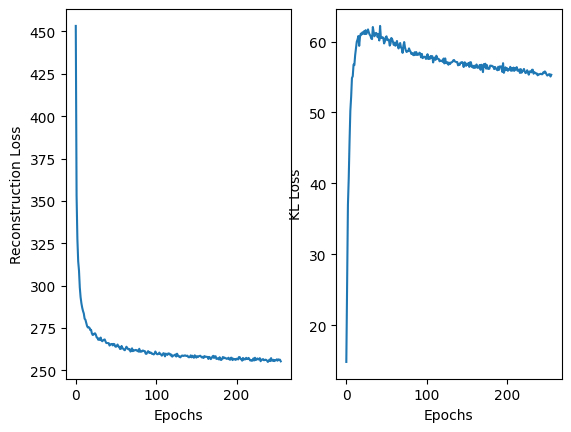

In [58]:
plt.subplot(1,2,1)
plt.plot(historyvae.history['reconstruction_loss'])
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.subplot(1,2,2)
plt.plot(historyvae.history['kl_loss'])
plt.xlabel('Epochs')
plt.ylabel('KL Loss')

Number of Gaussians: 1
Number of Gaussians: 2
Number of Gaussians: 3
Number of Gaussians: 4
Number of Gaussians: 5
Number of Gaussians: 6
Number of Gaussians: 7
Number of Gaussians: 8
Number of Gaussians: 9
Number of Gaussians: 10
Number of Gaussians: 11
Number of Gaussians: 12
Number of Gaussians: 13
Number of Gaussians: 14
Number of Gaussians: 15
Number of Gaussians: 16
Number of Gaussians: 17
Number of Gaussians: 18
Number of Gaussians: 19
Number of Gaussians: 20
Number of Gaussians: 21
Number of Gaussians: 22
Number of Gaussians: 23
Number of Gaussians: 24
Number of Gaussians: 25
Number of Gaussians: 26
Number of Gaussians: 27
Number of Gaussians: 28
Number of Gaussians: 29
24


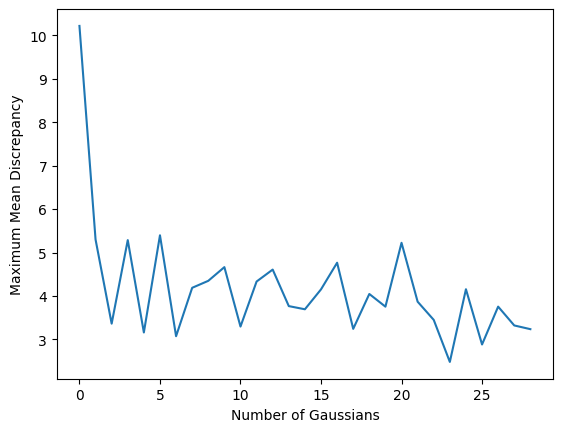

In [59]:
NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER,res_mmd_variational_autoencoder=find_best_GMM_by_MMD(variational_autoencoder,XTEST)
print(NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER)

In [60]:
variational_autoencoder.fitGMM(X,NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER)

GaussianMixture(covariance_type='diag', n_components=24, random_state=0)

Generation of Latent Space (200, 49)
Generated Images (200, 28, 28, 1)


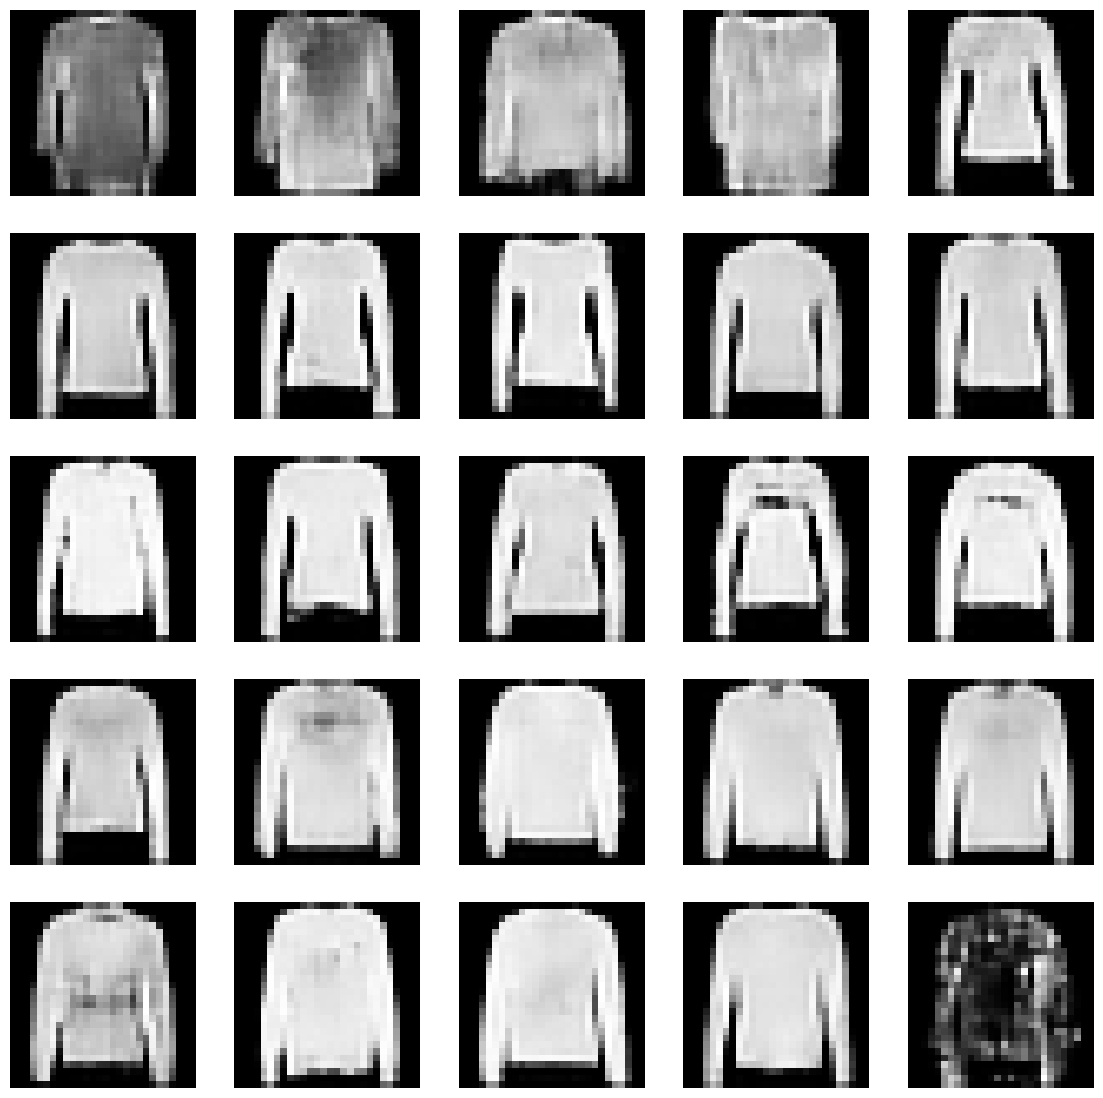

In [61]:
sample_gmm_variational_autoencoder=variational_autoencoder.sampleGMM(NSAMPLES_TEST)[0]
print('Generation of Latent Space',sample_gmm_variational_autoencoder.shape)
generate_sample_variational_autoencoder= variational_autoencoder.decode(sample_gmm_variational_autoencoder)
print('Generated Images',generate_sample_variational_autoencoder.shape)

plt.figure(figsize=[14,14])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(np.reshape(generate_sample_variational_autoencoder[i],[W,H,B]),cmap=CMAP)
    plt.axis('off')
plt.show()

In [62]:
mmd_gmm_variational_autoenconder= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_variational_autoencoder,[NSAMPLES_TEST,H*W*B]))


***************************


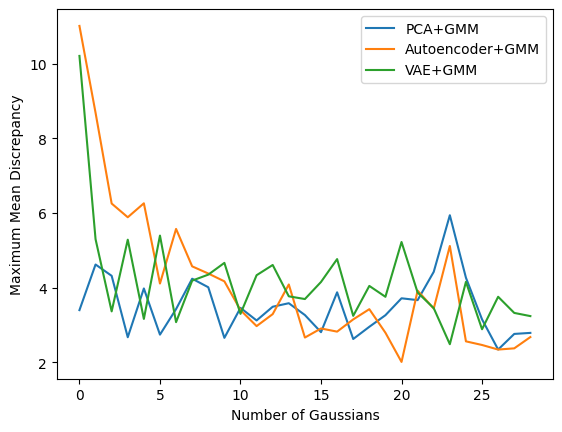

In [63]:
plt.plot(res_mmd_pca,label='PCA+GMM')
plt.plot(res_mmd_autoencoder,label='Autoencoder+GMM')
plt.plot(res_mmd_variational_autoencoder,label='VAE+GMM')
plt.legend()
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()



Question: According to MMD criteria which will be the best generator PCA, AutoEncoder, VAE?

**Answer:**
**With more Gaussians, the autoencoder provides a lower MMD when compared to PCA and VAE, which means that images with AE will be best generated.**

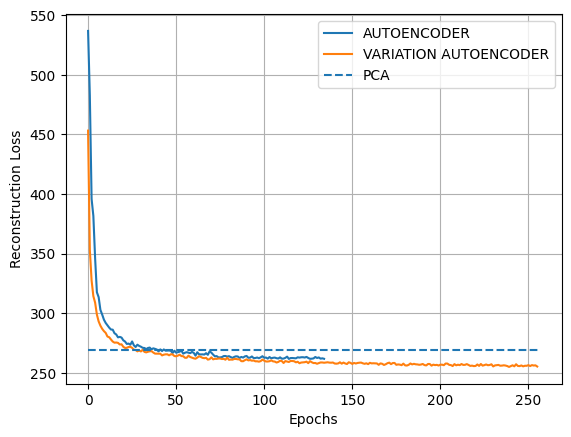

In [64]:
plt.plot(historyautoencoder.history['reconstruction_loss'],label='AUTOENCODER')
plt.plot(historyvae.history['reconstruction_loss'],label='VARIATION AUTOENCODER')
plt.hlines(reconstruction_error_PCA,0,NUM_EPOCHS,linestyles='dashed',label='PCA')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.grid()
plt.legend()

Question: According to Reconstruction Loss criteria which will be the best generator PCA, AutoEconder, VAE?

**Answer:** The lowest reconstruction loss can be found in the Variational Autoencoder, so it would be the best generator. This lowest loss is caused because the VAE's goal is to minimize the reconstruction loss with the KL regularization to fit the data.

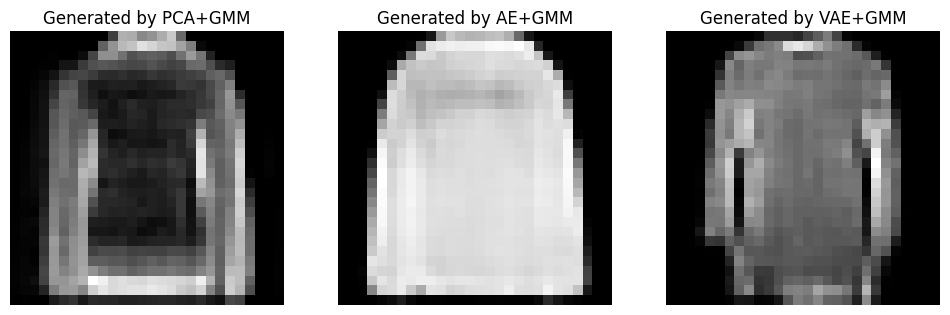

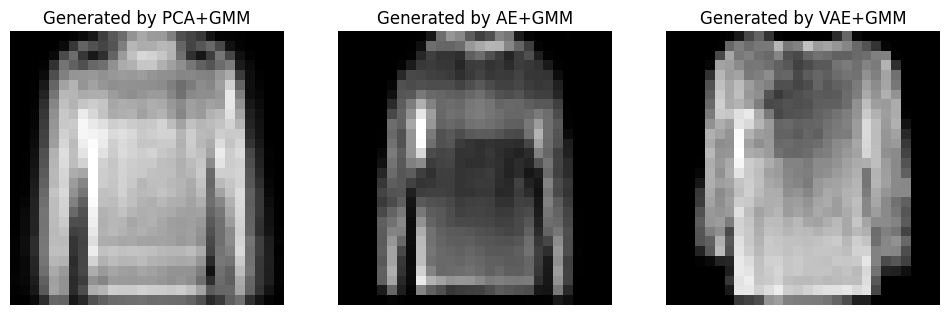

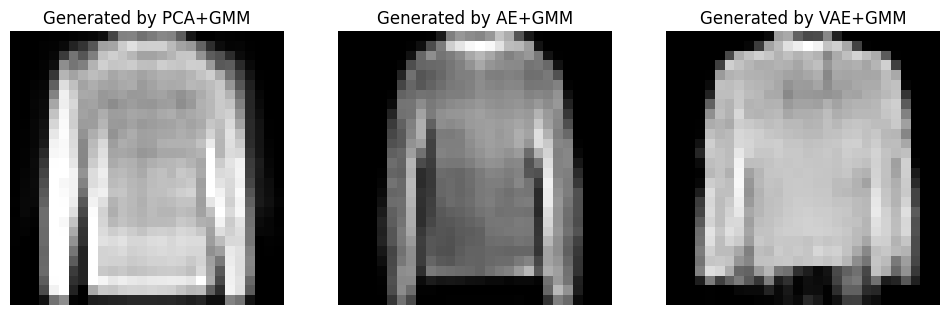

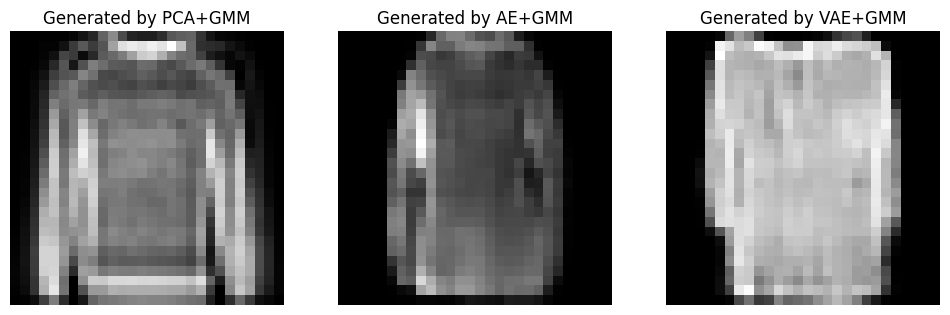

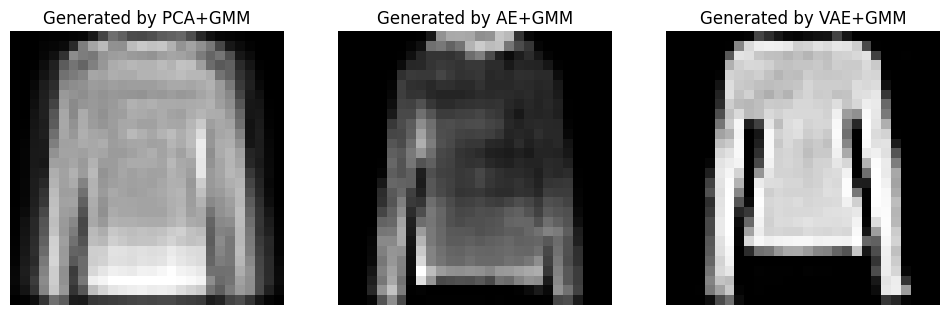

In [65]:
generate_sample_pca=np.reshape(generate_sample_pca,[NSAMPLES_TEST,H,W,B])

#Just if case for debugging
#print(generate_sample_pca.shape)
#print(generate_sample_autoencoder.shape)
#print(generate_sample_variational_autoencoder.shape)


for i in range(5):
    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.clip(generate_sample_pca[i],0.,1.),cmap=CMAP)
    plt.title('Generated by PCA+GMM')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(generate_sample_autoencoder[i],cmap=CMAP)
    plt.title('Generated by AE+GMM')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(generate_sample_variational_autoencoder[i],cmap=CMAP)
    plt.title('Generated by VAE+GMM')
    plt.axis('off')
    plt.show()



Question: According to visual appearance, which of the three methods do you prefer and why?

**Answer**:

VAE produces more nitid images, when compared to the indistinguished, blurred images by PCA and the undefined images, lacking edges, for example, generated by the AE.